In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/16/2018 11:25:09 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 11:25:11 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 11:25:12 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


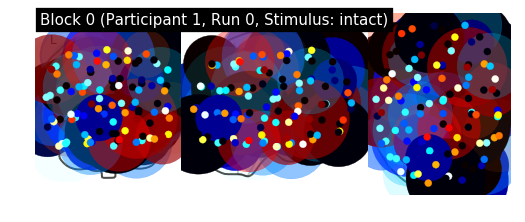

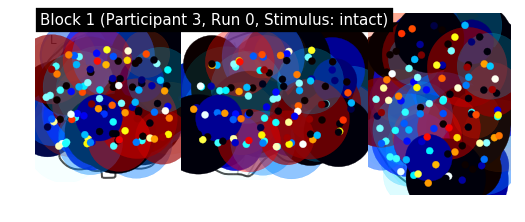

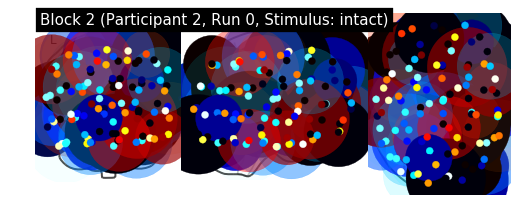

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

In [7]:
losses = dtfa.train(num_steps=200, learning_rate=5e-3, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8)

05/16/2018 11:27:02 [Epoch 1] (1086ms) Posterior free-energy 1.56049097e+11
05/16/2018 11:27:02 Saving checkpoint...
05/16/2018 11:27:03 [Epoch 2] (939ms) Posterior free-energy 2.19818783e+10
05/16/2018 11:27:04 [Epoch 3] (930ms) Posterior free-energy 7.65308211e+09
05/16/2018 11:27:05 [Epoch 4] (921ms) Posterior free-energy 7.56800512e+09
05/16/2018 11:27:06 [Epoch 5] (900ms) Posterior free-energy 6.43823053e+09
05/16/2018 11:27:07 [Epoch 6] (934ms) Posterior free-energy 5.04821146e+09
05/16/2018 11:27:08 [Epoch 7] (914ms) Posterior free-energy 3.91907098e+09
05/16/2018 11:27:09 [Epoch 8] (921ms) Posterior free-energy 3.40568038e+09
05/16/2018 11:27:09 [Epoch 9] (925ms) Posterior free-energy 3.08782694e+09
05/16/2018 11:27:10 [Epoch 10] (922ms) Posterior free-energy 2.90567962e+09
05/16/2018 11:27:11 [Epoch 11] (957ms) Posterior free-energy 2.85404826e+09
05/16/2018 11:27:11 Saving checkpoint...
05/16/2018 11:27:12 [Epoch 12] (935ms) Posterior free-energy 2.80497690e+09
05/16/2018 11:

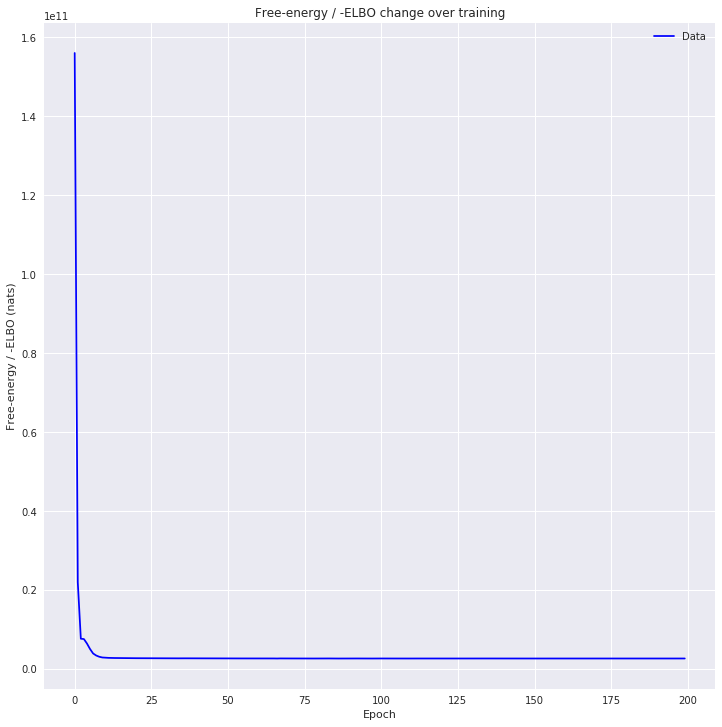

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


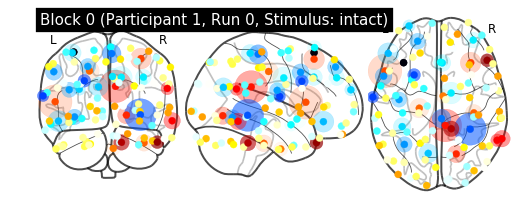

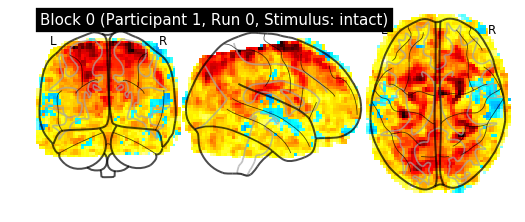

05/16/2018 11:31:46 Reconstruction Error (Frobenius Norm): 5.08937500e+03 out of 5.08479639e+03


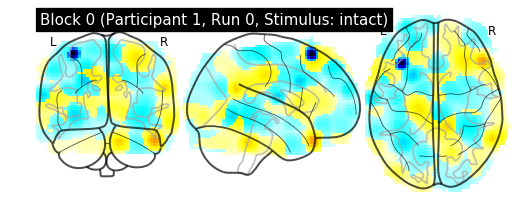

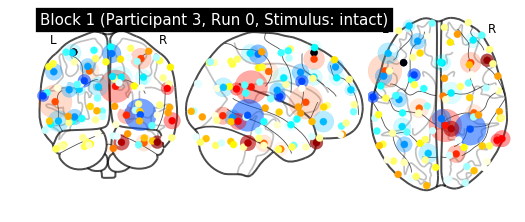

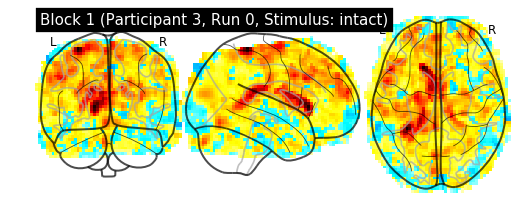

05/16/2018 11:32:12 Reconstruction Error (Frobenius Norm): 5.19980127e+03 out of 5.19534277e+03


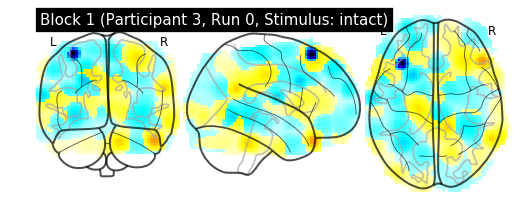

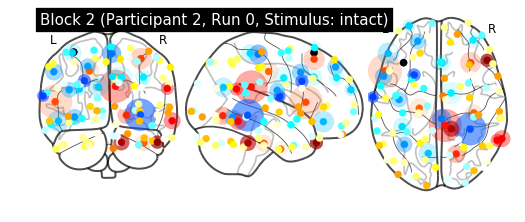

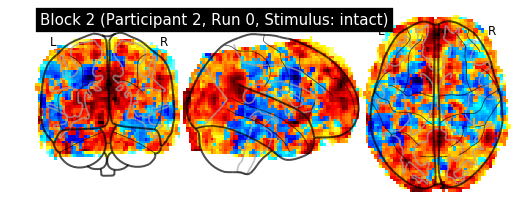

05/16/2018 11:32:38 Reconstruction Error (Frobenius Norm): 5.19974805e+03 out of 5.19534277e+03


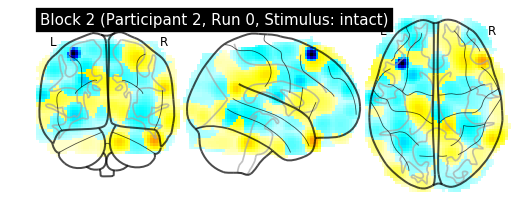

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


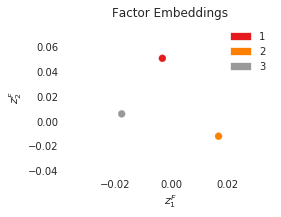

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


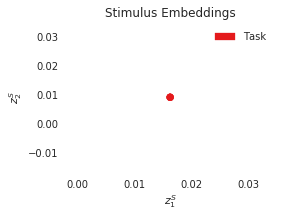

In [12]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)